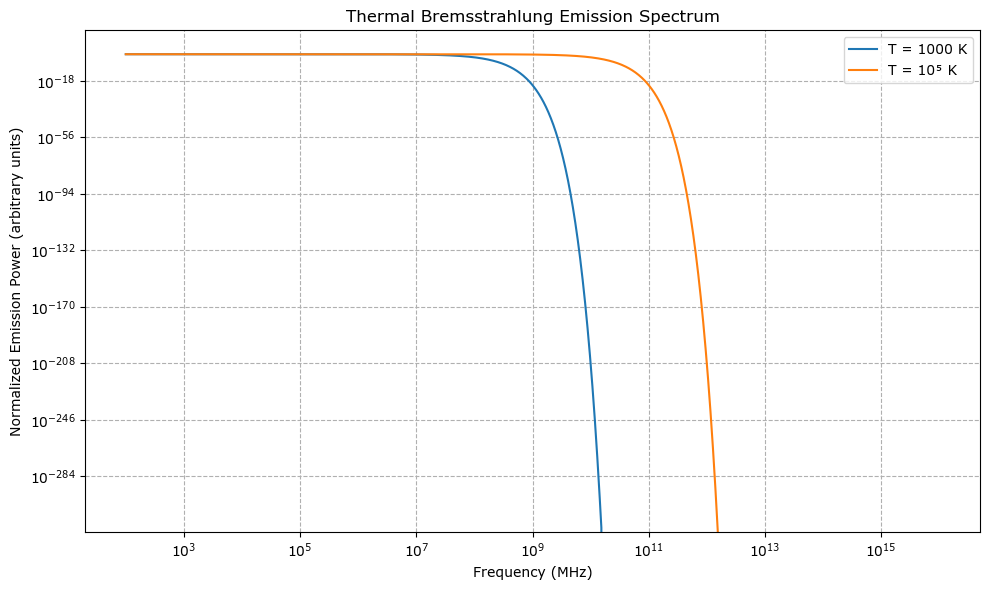

In [2]:
#Q3
import numpy as np
import matplotlib.pyplot as plt

# Constants
k_B = 1.38e-23       # Boltzmann constant, J/K
e = 1.6e-19          # Elementary charge, C
m_e = 9.11e-31       # Electron mass, kg
m = 2 * m_e          # Given: particle mass = 2 * electron mass
n_e = 1e5            # Number density of electrons, m^-3
n_i = 1e5            # Number density of ions, m^-3
h = 6.626e-34        # Planck's constant, J*s
c = 3e8              # Speed of light in m/s

# Frequency range: 10^2 MHz to 10^13 MHz
freq = np.logspace(8, 22, 1000)  # Converted MHz to Hz

# Temperature
T = [1e3,1e5]            # in K


# Define a function for thermal bremsstrahlung emissivity 
# ε(ν) propto n_e * n_i * g_ff * exp(-hν / kT) / sqrt(T)

def bremsstrahlung_emission(freq, T):
    g_ff = 1         # Leave Gaunt factor as 1 for simplicity
    Z = 1.           # Taking Charge as same for particle
    return (2**5)*np.pi*np.e*((2*np.pi/(3*k_B*m))**(1/2))*(Z**2)*n_e * n_i * g_ff * np.exp(-h * freq / (k_B * T)) / (np.sqrt(T)*3*m*(c**3))

# Compute emission spectra
emission_T1 = bremsstrahlung_emission(freq, T[0])
emission_T2 = bremsstrahlung_emission(freq, T[1])

# Normalize for plotting
emission_T1 /= np.max(emission_T1)
emission_T2 /= np.max(emission_T2)

# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(freq / 1e6, emission_T1, label='T = 1000 K')
plt.loglog(freq / 1e6, emission_T2, label='T = 10⁵ K')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Normalized Emission Power (arbitrary units)")
plt.title("Thermal Bremsstrahlung Emission Spectrum")
plt.legend()
plt.grid(True, which='both', ls='--')
plt.tight_layout()
plt.savefig('Astro2Bremsstrahlung.png')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (500,) and (1000,)

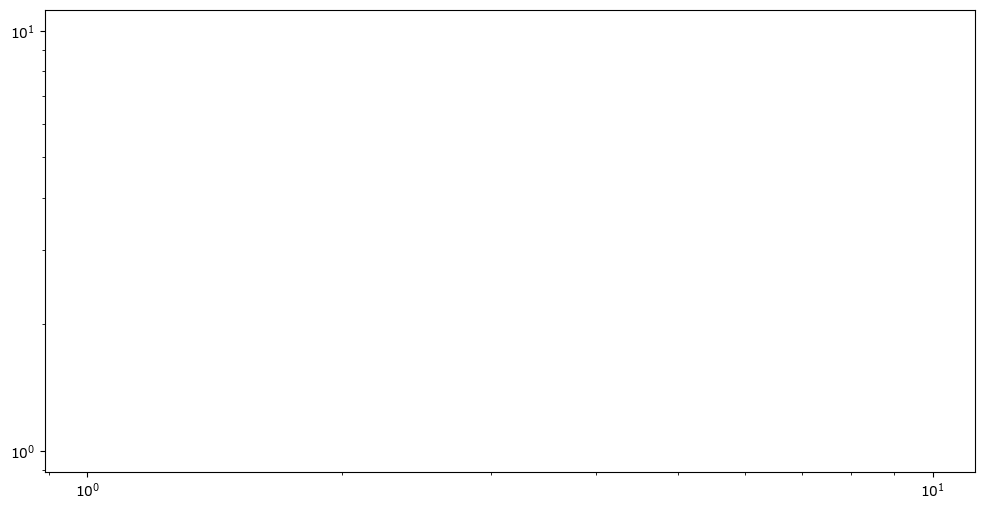

In [6]:
#Q4
#parameters
Z = 1 
gaunt_factor = 1  
A_si = 0.018  

# Frequencies from 10^2 MHz to 10^9 MHz (Hz)
freq = np.logspace(8, 15, num=1000)  # Hz

# Lengths of the medium 
L = [1e2, 1e10]  # in km
l_points = np.linspace(0, 1e10, 1000)  # in km

# Position-dependent ion/electron density function (in cm^-3), converted to m^-3
def ni(l_km):
    return 10 * (l_km / 1000)**2 * 1e6  # convert to m^-3

# Compute optical depth
def optical_depth(freq, T, L_km):
    l_km = np.linspace(0, L_km, 1000)
    n_vals = ni(l_km)
    dl_m = (L_km * 1e3) / 1000  # each segment in meters
    integrand = n_vals**2  # since n_e = n_i
    integral = np.sum(integrand) * dl_m  
    tau_nu = (Z**2 * A_si * gaunt_factor) * integral * T**(-1.5) * freq**(-2)
    return tau_nu

# Compute optical depths
tau_A_T1 = optical_depth(freq,L[0],T[0])
tau_A_T2 = optical_depth(freq,L[0],T[1])
tau_B_T1 = optical_depth(freq,L[1],T[0])
tau_B_T2 = optical_depth(freq,L[1],T[1])

# Plotting
plt.figure(figsize=(12, 6))
plt.loglog(frequencies / 1e6, tau_A_T1, label='L=10^2 km, T=1000 K')
plt.loglog(frequencies / 1e6, tau_A_T2, label='L=10^2 km, T=10⁵ K')
plt.loglog(frequencies / 1e6, tau_B_T1, label='L=10^10 km, T=1000 K')
plt.loglog(frequencies / 1e6, tau_B_T2, label='L=10^10 km, T=10⁵ K')

plt.xlabel('Frequency (MHz)')
plt.ylabel(r'Optical Depth $\tau(\nu)$ (arbitrary units)')
plt.title('Optical Depth vs Frequency (Thermal Bremsstrahlung, SI Units)')
plt.grid(True, which='both', ls='--', lw=0.5)
plt.legend()
plt.tight_layout()
plt.show()